In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('image_converted.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ORB detector
orb = cv2.ORB_create(nfeatures=500)

# Detect keypoints and descriptors
kp, des = orb.detectAndCompute(gray, None)

# Draw keypoints (with orientation and scale)
img_with_kp = cv2.drawKeypoints(
    img, kp, None,
    color=(0, 255, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Convert for matplotlib
img_rgb = cv2.cvtColor(img_with_kp, cv2.COLOR_BGR2RGB)

# Plot
plt.figure(figsize=(8, 4))
plt.imshow(img_rgb)
plt.title("ORB Keypoints and Descriptors")
plt.axis('off')
plt.show()


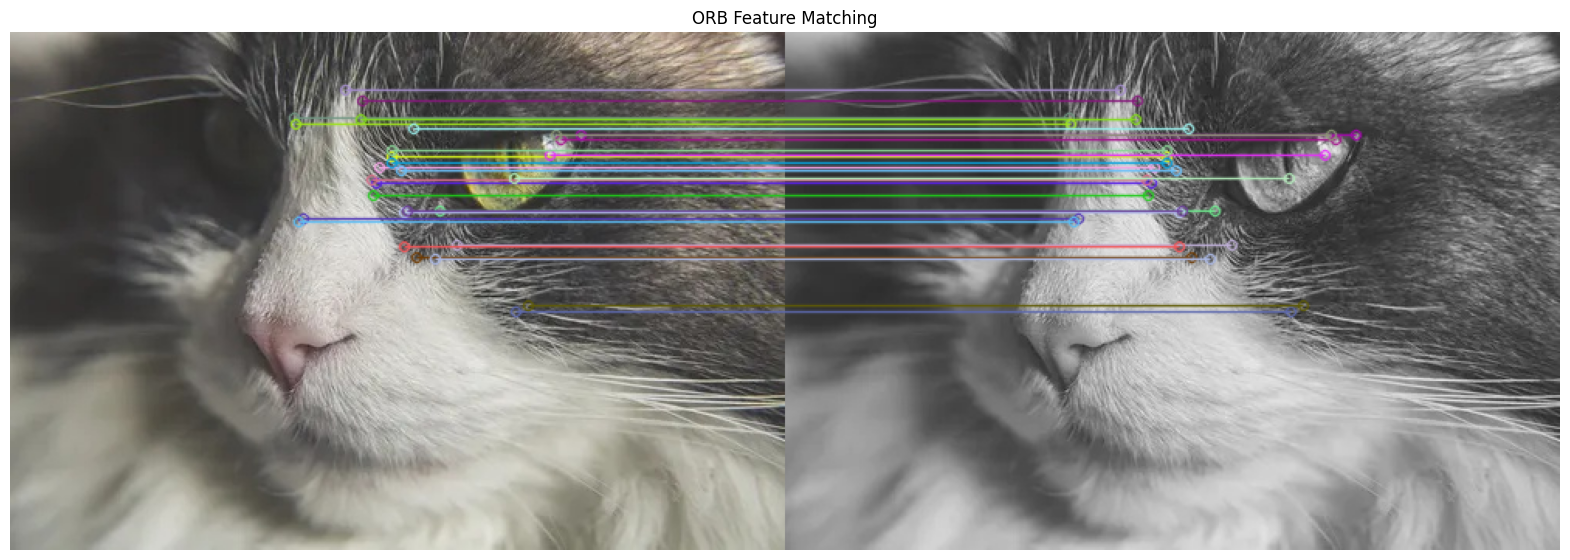

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread('image_converted.jpg')
img2 = cv2.imread('grayscale_image.jpg')

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB detector
orb = cv2.ORB_create(nfeatures=500)

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Brute Force Matcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top N matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=2)

# Convert to RGB for matplotlib
matched_img_rgb = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# Plot
plt.figure(figsize=(20, 10))
plt.imshow(matched_img_rgb)
plt.title("ORB Feature Matching")
plt.axis('off')
plt.show()
